In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
 Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#1.
data=pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")
print(data)
print ("\n1.first 10 rows of dataset:\n")
print(data.head(10))
#2.
rows,columns=data.shape
print(f"\n2. the dataset have {rows} rows and {columns} columns\n")

#3.
print ("\n3.columns and their data types:\n")
print (data.dtypes)




         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

In [ ]:
#1.

data = pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()
print(f"1.\n the mean score is :{mean_score}, the median score is {median_score} and the standard deviation score is :{std_score}")

#2
max_score_country = data.loc[data['score'].idxmax(), 'Country name']
min_score_country = data.loc[data['score'].idxmin(), 'Country name']
print(f"2.\n the country with the highest score is {max_score_country} and the country with the lowest score is {min_score_country}.")


1.
 the mean score is :5.52758041958042, the median score is 5.785 and the standard deviation score is :1.1707165099442995
2.
 the country with the highest score is Finland and the country with the lowest score is Afghanistan.


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
#1
missing=data.isnull().sum()
print("missing values per column:")
print(missing)

missing values per column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:
#1.
filtered_data= data[data['score']>7.5]
print("1.the countries with a score greater than 7.5 is:\n")
print(filtered_data)
#2
sorted_data = filtered_data.sort_values(by='Log GDP per capita' , ascending=False)
print("\n2.top 10 countris by GDP per capita are:\n")
print(sorted_data.head(10))



1.the countries with a score greater than 7.5 is:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

2.top 10 countris by GDP per capita are:

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881 

• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
#1
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
data ['Happiness Category']=data['score'].apply(categorize_happiness)
print("1.the new column Happiness Category is:\n")
print(data[['Country name','score','Happiness Category']].head(10))

1.the new column Happiness Category is:

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
• Plot a histogram for the Score column to show its distribution and also interpret.
• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

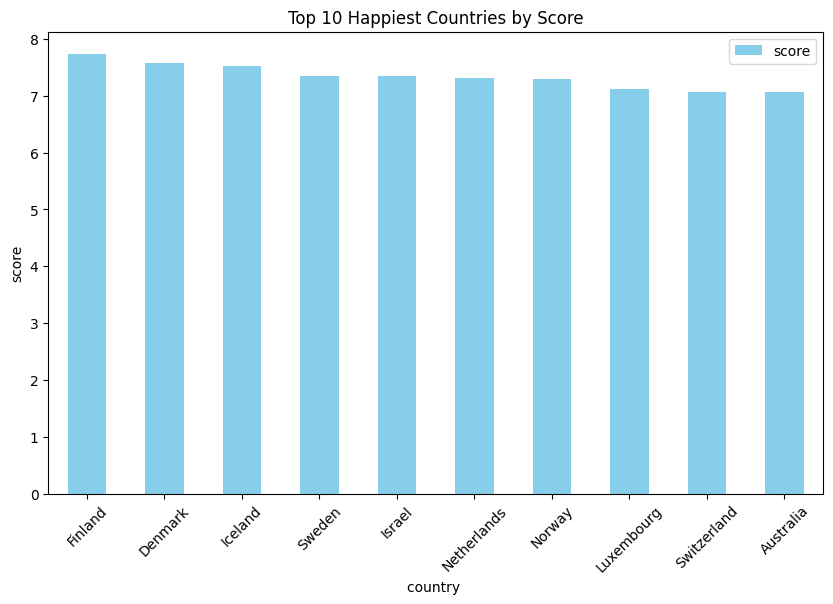

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")

top_10_happiest = data.nlargest(10, 'score')
top_10_happiest.plot(
    x='Country name', y='score', kind='bar', color='skyblue', figsize=(10, 6)
)
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("country ")
plt.ylabel("score")
plt.xticks(rotation=45)
plt.show()


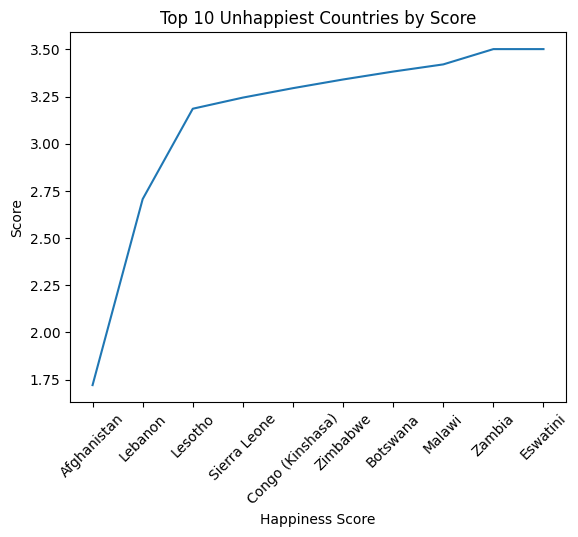

In [19]:
#2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")
top_10_unhappiest = data.nsmallest(10, 'score')
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest)
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

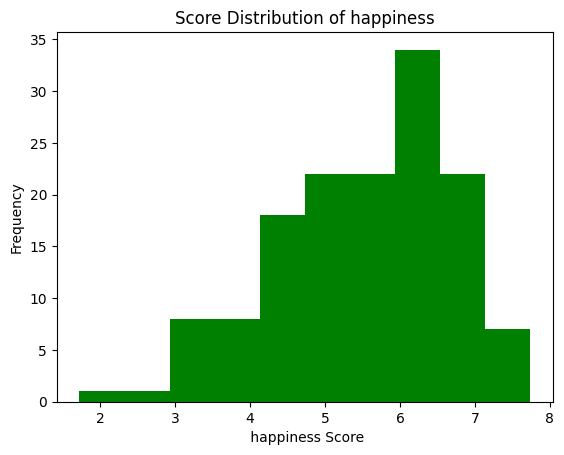

In [22]:
#3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")
plt.hist(data['score'],bins=10,color='green')
plt.title('Score Distribution of happiness')
plt.xlabel(' happiness Score')
plt.ylabel('Frequency')
plt.show()

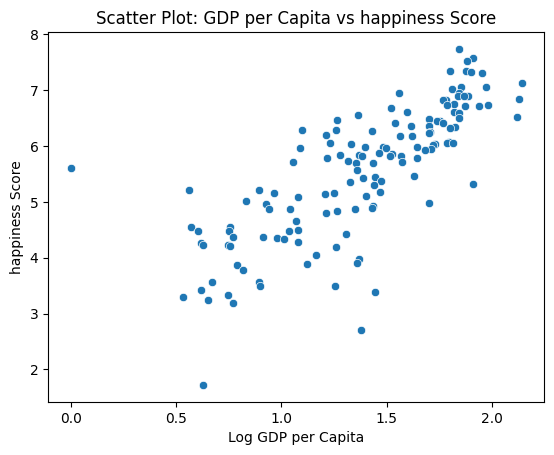

In [20]:
#4
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")
sns.scatterplot(x='Log GDP per capita', y='score', data=data)
plt.title('Scatter Plot: GDP per Capita vs happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('happiness Score')
plt.show()


3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
#1
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
#2
dataset=pd.read_csv("/content/drive/MyDrive/data/WHR-2024-5CS037.csv")
south_asian_countries = dataset[dataset['Country name'].isin(south_asian_countries)]
#3
south_asian_countries.to_csv('/content/drive/MyDrive/data/south_asian_countries.csv', index=False)
print("the filtered south asia dataset is saved.")


the filtered south asia dataset is saved.


Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

<ipython-input-23-50aa7ee30454>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (y=top_5['Country name'],x=top_5['Composite Score'],palette='viridis')


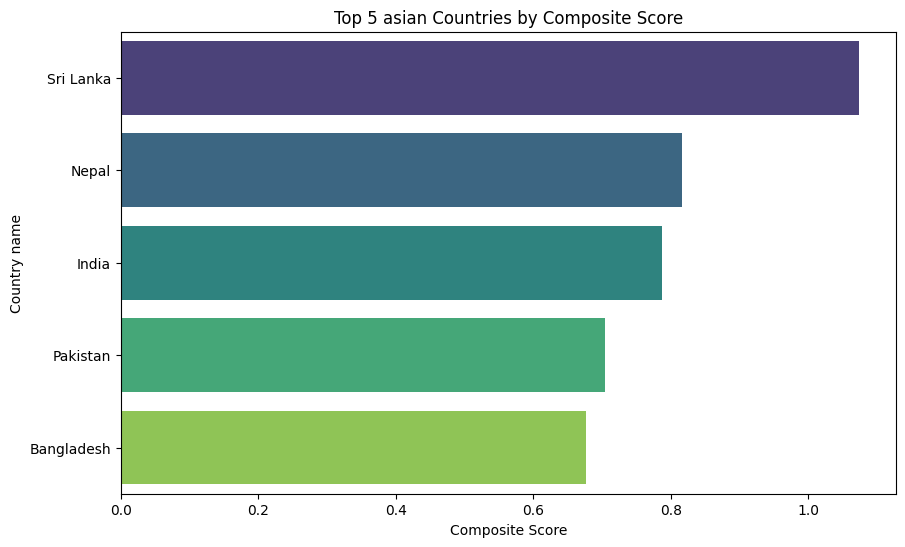

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

south_asian_countries = pd.read_csv('/content/drive/MyDrive/data/south_asian_countries.csv')
#1
south_asian_countries['Composite Score'] = 0.40 * south_asian_countries['Log GDP per capita'] + 0.30 * south_asian_countries['Social support'] + 0.30 * south_asian_countries['Healthy life expectancy']
#2
south_asian_countries=south_asian_countries.sort_values(by='Composite Score',ascending=False)
#3
top_5=south_asian_countries.head(5)
plt.figure(figsize=(10, 6))
sns.barplot (y=top_5['Country name'],x=top_5['Composite Score'],palette='viridis')
plt.title('Top 5 asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country name')
plt.show()


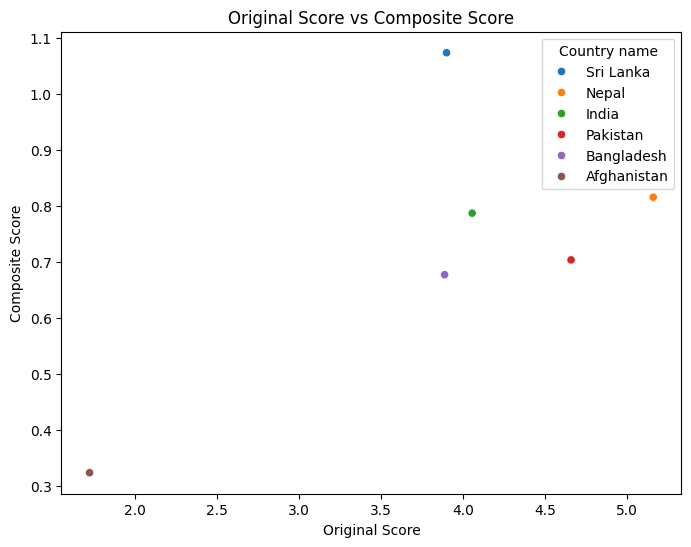

In [ ]:
#4
plt.figure(figsize=(8,6))
sns.scatterplot(x=south_asian_countries['score'],y=south_asian_countries['Composite Score'],hue=south_asian_countries['Country name'])
plt.title('Original Score vs Composite Score')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.show()

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [24]:
#1 and 2
import matplotlib.pyplot as plt
import seaborn as sns

south_asian_countries = pd.read_csv('/content/drive/MyDrive/data/south_asian_countries.csv')
score_q1=south_asian_countries['score'].quantile(0.25)
score_q3=south_asian_countries['score'].quantile(0.75)
score_iqr=score_q3-score_q1

score_lower_bound=score_q1-1.5*score_iqr
score_upper_bound=score_q3+1.5*score_iqr

gdp_q1=south_asian_countries['Log GDP per capita'].quantile(0.25)
gdp_q3=south_asian_countries['Log GDP per capita'].quantile(0.75)
gdp_iqr=gdp_q3-gdp_q1

gdp_lower_bound=gdp_q1-1.5*gdp_iqr
gdp_upper_bound=gdp_q3+1.5*gdp_iqr

outliers_score=south_asian_countries[(south_asian_countries['score']<score_lower_bound) | (south_asian_countries['score']>score_upper_bound)]
outliers_gdp=south_asian_countries[(south_asian_countries['Log GDP per capita']<gdp_lower_bound) | (south_asian_countries['Log GDP per capita']>gdp_upper_bound)]

print("outlier countries based on score:\n",outliers_score[['Country name','score','Log GDP per capita']])
print("\noutlier countries based on GDP per capita:\n",outliers_gdp[['Country name','score','Log GDP per capita']])

outlier countries based on score:
   Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

outlier countries based on GDP per capita:
   Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


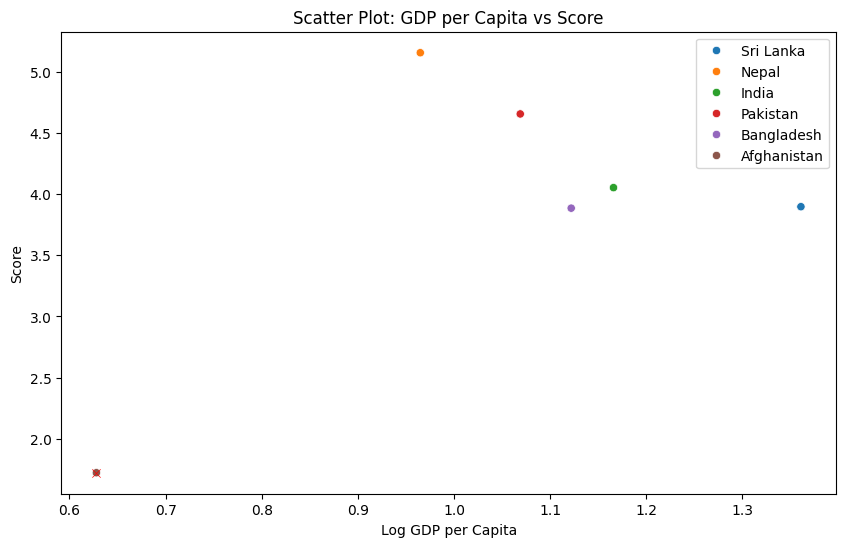

In [ ]:
#3
plt.figure(figsize=(10,6))
sns.scatterplot(x=south_asian_countries['Log GDP per capita'],y=south_asian_countries['score'],hue=south_asian_countries['Country name'])
sns.scatterplot(x=outliers_score['Log GDP per capita'],y=outliers_score['score'],color='red',marker='x')
plt.title('Scatter Plot: GDP per Capita vs Score')

plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.show()

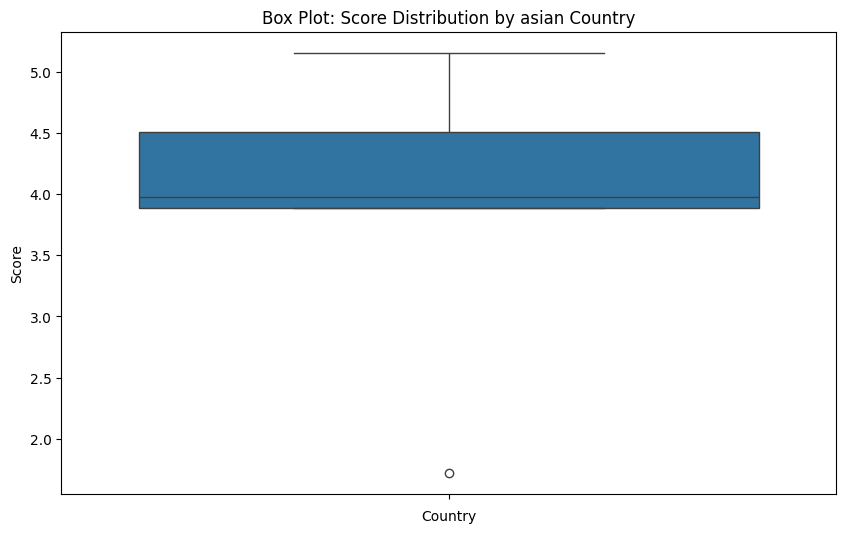

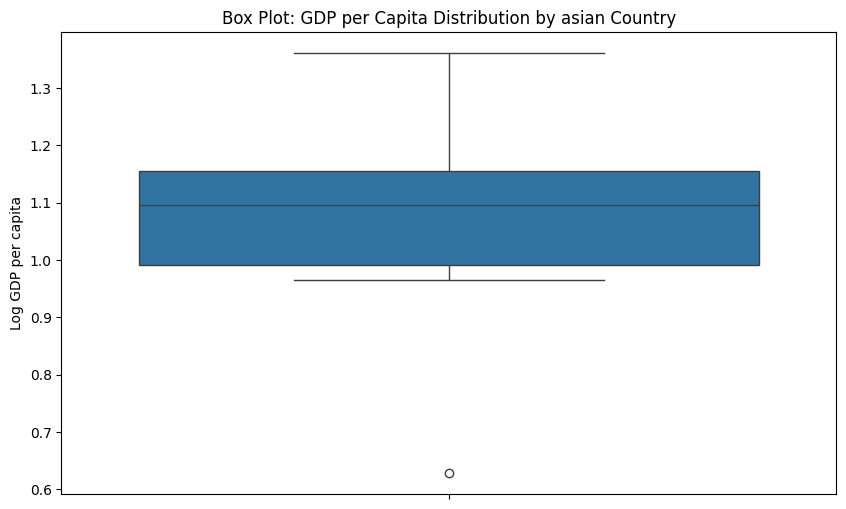

In [ ]:
#4
#plot for Score
plt.figure(figsize=(10,6))
sns.boxplot(y=south_asian_countries['score'])
plt.title('Box Plot: Score Distribution by asian Country')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()
#plot for GDP
plt.figure(figsize=(10,6))
sns.boxplot(y=south_asian_countries['Log GDP per capita'])
plt.title('Box Plot: GDP per Capita Distribution by asian Country')
plt.show()


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
correlation between Generosity and Score: 0.874512371253192


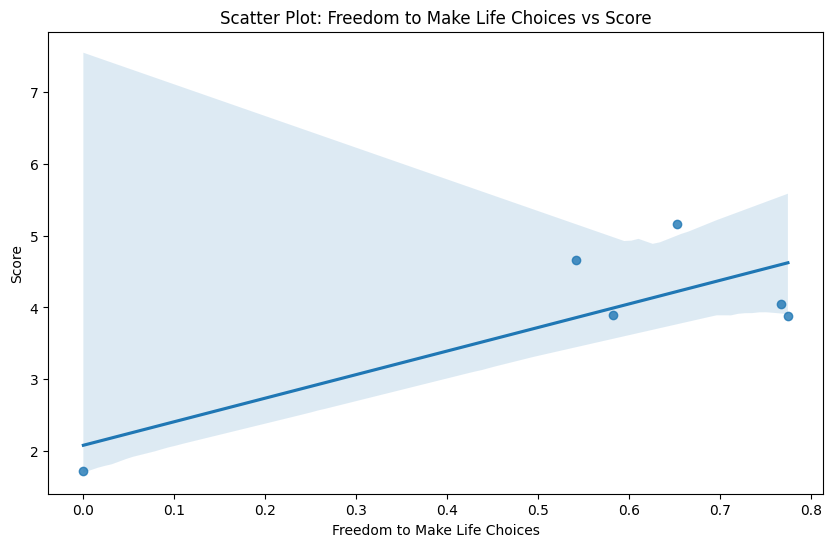

choice vs score: a positive correlation
generosity vs score: a negative correlation


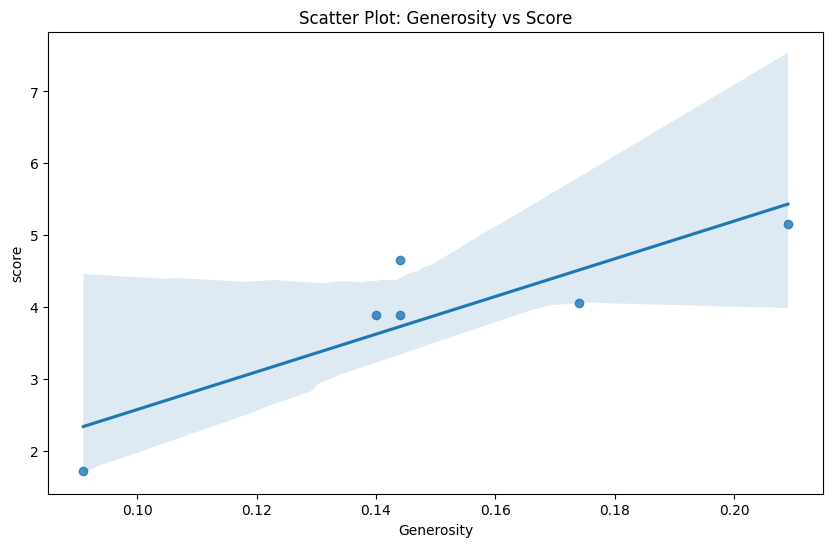

In [ ]:

#1
correlation_freedom = south_asian_countries['Freedom to make life choices'].corr(south_asian_countries['score'], method='pearson')
correlation_generosity = south_asian_countries['Generosity'].corr(south_asian_countries['score'], method='pearson')

print(f"correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"correlation between Generosity and Score: {correlation_generosity}")

#2
plt.figure(figsize=(10, 6))
sns.regplot(x=south_asian_countries['Freedom to make life choices'], y=south_asian_countries['score'])
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=south_asian_countries['Generosity'], y=south_asian_countries['score'])
plt.title('Scatter Plot: Generosity vs Score')
#3
print("choice vs score: a positive correlation")
print("generosity vs score: a negative correlation")


Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

<ipython-input-37-d5d3a1203150>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_positive_gap, top_negative_gap]), palette='Spectral')


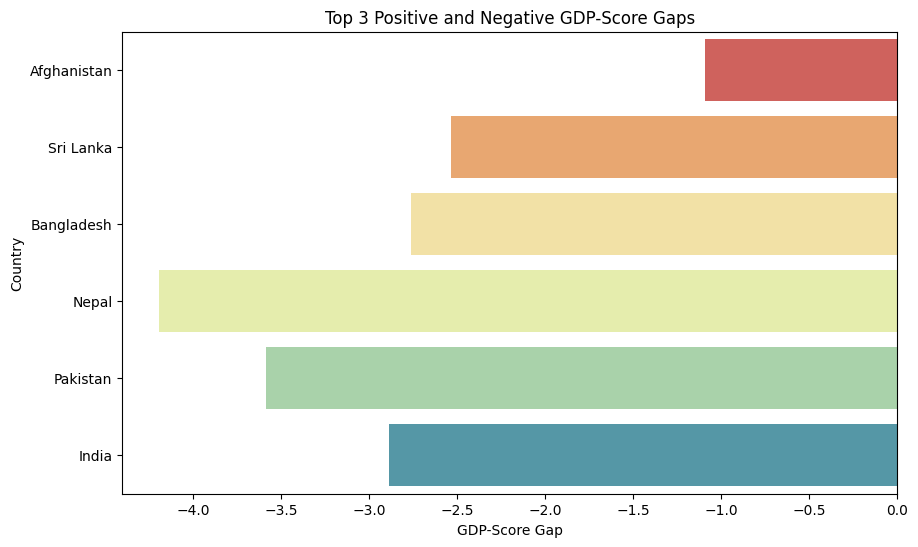

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
south_asian_countries = pd.read_csv('/content/drive/MyDrive/data/south_asian_countries.csv')

# 1. Create a new column for GDP-Score Gap
south_asian_countries['GDP-Score Gap'] = south_asian_countries['Log GDP per capita'] - south_asian_countries['score']

# 2. Sort values by 'GDP-Score Gap' in ascending and descending order
ascending_gap = south_asian_countries.sort_values(by='GDP-Score Gap', ascending=False)
descending_gap = south_asian_countries.sort_values(by='GDP-Score Gap', ascending=True)

# 3. Get the top 3 countries with the largest positive and negative GDP-Score Gap
top_positive_gap = ascending_gap.head(3)
top_negative_gap = descending_gap.head(3)

# 4. Plot the top 3 countries with the largest positive GDP-Score Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_positive_gap, top_negative_gap]), palette='Spectral')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()




3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]


In [53]:
import pandas as pd

middle_eastern_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


full_dataset = pd.read_csv('/content/drive/MyDrive/data/WHR-2024-5CS037.csv')


middle_eastern_dataset = full_dataset[full_dataset['Country name'].isin(middle_east_countries)]

print(middle_eastern_dataset.head())


middle_eastern_dataset.to_csv('/content/drive/MyDrive/data/middle_eastern_countries.csv', index=False)



            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual  
4                       0.193                2.298  
12                      0.17

Complete the following task:
1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_asian_countries = pd.read_csv('/content/drive/MyDrive/data/south_asian_countries.csv')
middle_eastern_countries = pd.read_csv('/content/drive/MyDrive/data/middle_eastern_countries.csv')
south_asian_countries["region"] = "South Asia"
middle_eastern_countries["region"] = "Middle East"
combined_ = pd.concat([south_asian_countries, middle_eastern_countries], ignore_index=True)

mean_score_south_asia = south_asian_countries["score"].mean()
mean_score_middle_east = middle_eastern_countries["score"].mean()
sa_std_score = south_asian_countries["score"].std()
me_std_score = middle_eastern_countries["score"].std()
print(f"Mean score for South Asia: {mean_score_south_asia}")
print(f"Mean score for Middle East: {mean_score_middle_east}")

if mean_score_south_asia > mean_score_middle_east:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")

Mean score for South Asia: 3.895666666666667
Mean score for Middle East: 5.412100000000001
Middle East has higher happiness scores on average.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

<ipython-input-59-849e8fc0314f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country name", y="score", data=sa_top_3, palette="viridis", label="South Asia")


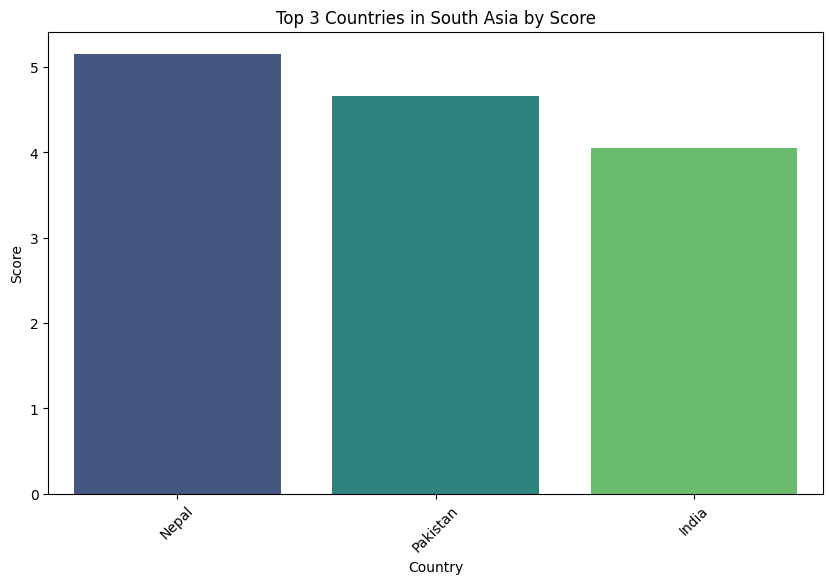

<ipython-input-59-849e8fc0314f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country name", y="score", data=sa_bottom_3, palette="viridis", label="South Asia")


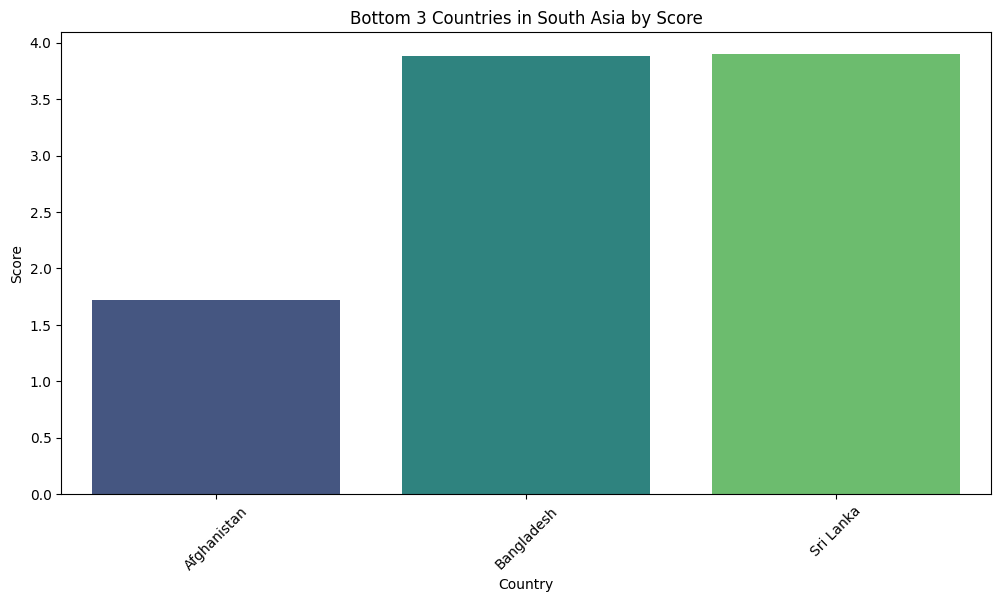

In [59]:
sa_top_3 = south_asian_countries.nlargest(3, "score")
sa_bottom_3 = south_asian_countries.nsmallest(3, "score")
me_top_3 = middle_eastern_countries.nlargest(3, "score")
me_bottom_3 = middle_eastern_countries.nsmallest(3, "score")
#ploat bar chart
plt.figure(figsize=(10, 6))

sns.barplot(x="Country name", y="score", data=sa_top_3, palette="viridis", label="South Asia")
plt.title("Top 3 Countries in South Asia by Score")
plt.xlabel("Country")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))

sns.barplot(x="Country name", y="score", data=sa_bottom_3, palette="viridis", label="South Asia")
plt.title("Bottom 3 Countries in South Asia by Score")
plt.xlabel("Country")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

<Figure size 1200x600 with 0 Axes>

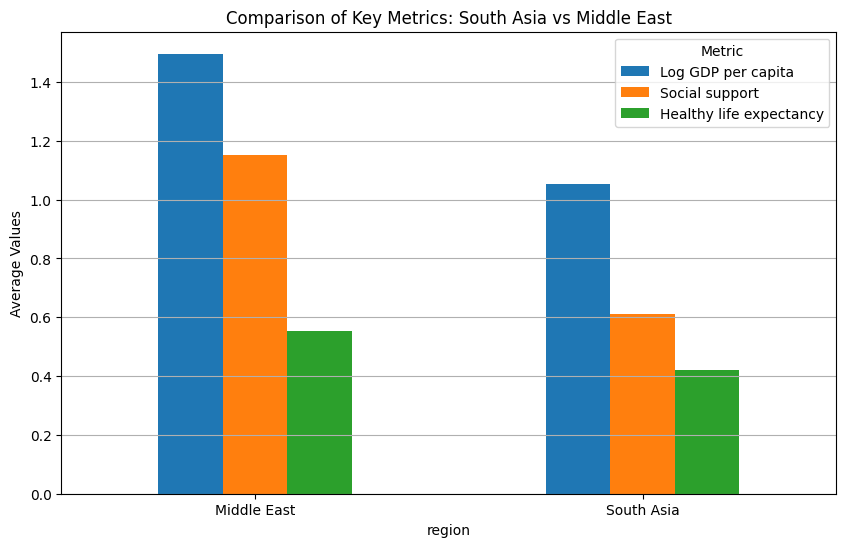

In [61]:
key_metrics = ["Log GDP per capita", "Social support", "Healthy life expectancy"] # Updated column names
plt.figure(figsize=(12, 6))

#group bar chart
metric_means = combined_.groupby("region")[key_metrics].mean()

metric_means.plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Key Metrics: South Asia vs Middle East")
plt.ylabel("Average Values")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.grid(axis="y")
plt.show()

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [65]:
sa_range=south_asian_countries["score"].max()-south_asian_countries["score"].min()
me_range=middle_eastern_countries["score"].max()-middle_eastern_countries["score"].min()

sa_cv=south_asian_countries["score"].std()/south_asian_countries["score"].mean()
me_cv=middle_eastern_countries["score"].std()/middle_eastern_countries["score"].mean()

print(f"Range (max - min) for South Asia: {sa_range}")
print(f"Range (max - min) for Middle East: {me_range}")

if sa_cv > me_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")

Range (max - min) for South Asia: 3.4370000000000003
Range (max - min) for Middle East: 4.634
South Asia has greater variability in happiness.


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  

Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


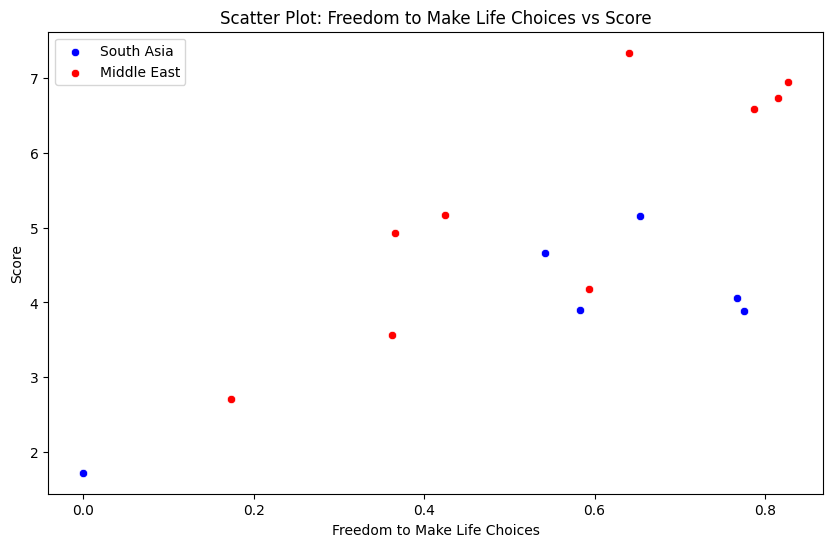

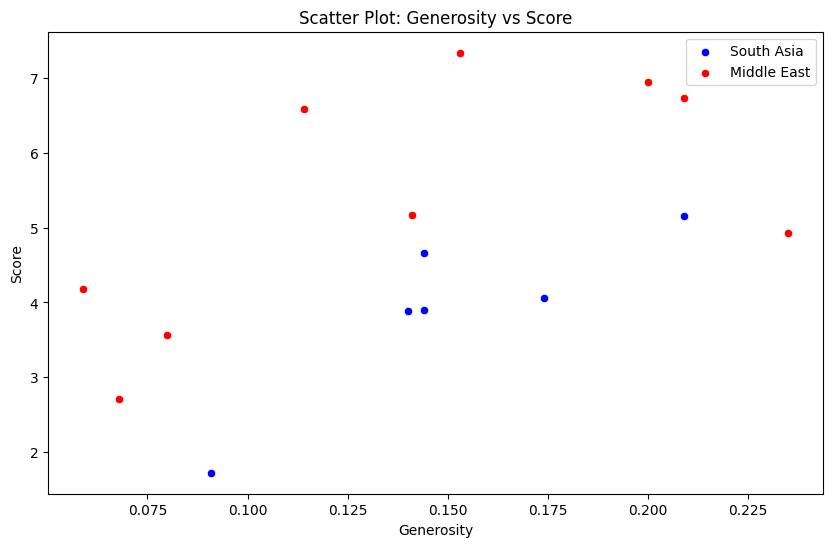

In [68]:
#south east
south_asian_countries = pd.read_csv('/content/drive/MyDrive/data/south_asian_countries.csv')

sa_correlation = south_asian_countries[["score", "Freedom to make life choices", "Generosity"]].corr()

#middle east

me_correlation = middle_eastern_countries[["score", "Freedom to make life choices", "Generosity"]].corr() # Changed column name to match south_asian_countries

print("South Asia Correlation Matrix:")
print(sa_correlation)
print("\nMiddle East Correlation Matrix:")
print(me_correlation)

#scatter plot freedom vs score
plt.figure(figsize=(10, 6))

sns.scatterplot(x="Freedom to make life choices", y="score", data=south_asian_countries, color="blue", label="South Asia")
sns.scatterplot(x="Freedom to make life choices", y="score", data=middle_eastern_countries, color="red", label="Middle East") # Changed column name to match south_asian_countries
plt.title("Scatter Plot: Freedom to Make Life Choices vs Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Score")
plt.legend()
plt.show()

#scatter plot generosity vs score
plt.figure(figsize=(10,6))
sns.scatterplot(x="Generosity",y="score",data=south_asian_countries,color="blue",label="South Asia") # Replace with actual column name
sns.scatterplot(x="Generosity",y="score",data=middle_eastern_countries,color="red",label="Middle East") # Changed column name to match south_asian_countries
plt.title("Scatter Plot: Generosity vs Score")
plt.xlabel("Generosity")
plt.ylabel("Score")
plt.legend()
plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

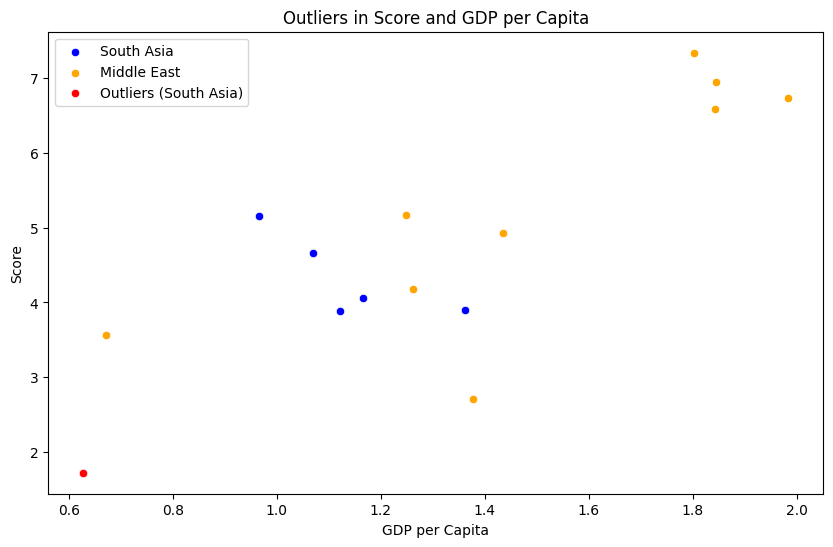

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(column, region_data):
    Q1 = region_data[column].quantile(0.25)
    Q3 = region_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return region_data[(region_data[column] < lower_bound) | (region_data[column] > upper_bound)]

# Read the south asian and middle east data into the variables
south_asia_data = pd.read_csv('/content/drive/MyDrive/data/south_asian_countries.csv') # Reading south asian countries data
middle_east_data = pd.read_csv('/content/drive/MyDrive/data/middle_eastern_countries.csv') # Reading middle eastern countries data


south_asia_outliers = detect_outliers('score', south_asia_data)
middle_east_outliers = detect_outliers('score', middle_east_data)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='blue', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, color='orange', label='Middle East')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='red', label='Outliers (South Asia)')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='green', label='Outliers (Middle East)')
plt.title('Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()




Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.


<ipython-input-71-d0d4156d3083>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="score", data=combined_, palette="Set3")


Text(0.5, 0, 'Region')

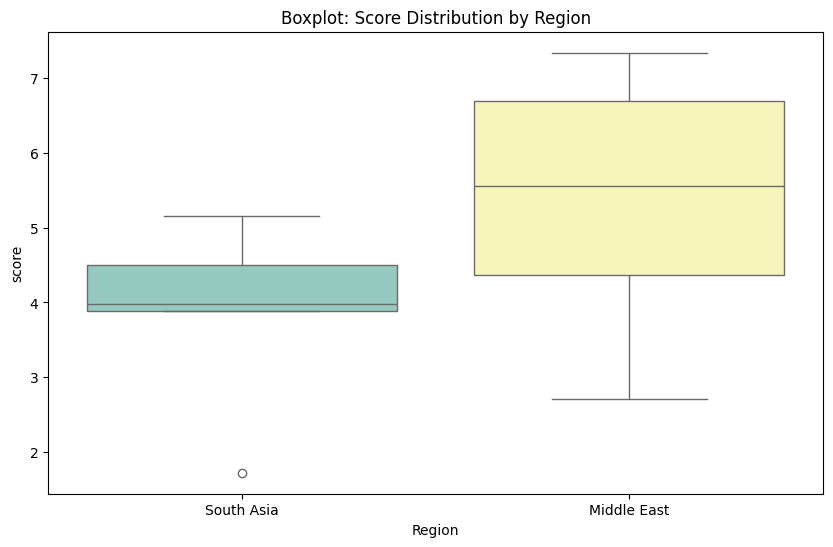

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="region", y="score", data=combined_, palette="Set3")
plt.title("Boxplot: Score Distribution by Region")
plt.xlabel("Region")